## Task 3 Project Tsk Flow

#### 1. Data Understanding

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Basic understanding
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check blank spaces
(df == " ").sum()

# Convert blank spaces to NaN
df.replace(" ", np.nan, inplace=True)

# Check missing values
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### 2. Data Cleaning

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# Drop rows with missing values (small % of data)
df.dropna(inplace=True)
# Remove customers with tenure = 0 (cannot compute avg spend)
df = df[df["tenure"] > 0]


#### 3. Feature Engineering

In [7]:
df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "13-24", "25-48", "49-72"]
)
df["AvgMonthlySpend"] = df["TotalCharges"] / df["tenure"]
binary_cols = ["Partner", "Dependents", "PhoneService",
               "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})
df_encoded = pd.get_dummies(
    df,
    columns=["Contract", "InternetService", "PaymentMethod"],
    drop_first=True
)


#### 4. EDA & Visualization

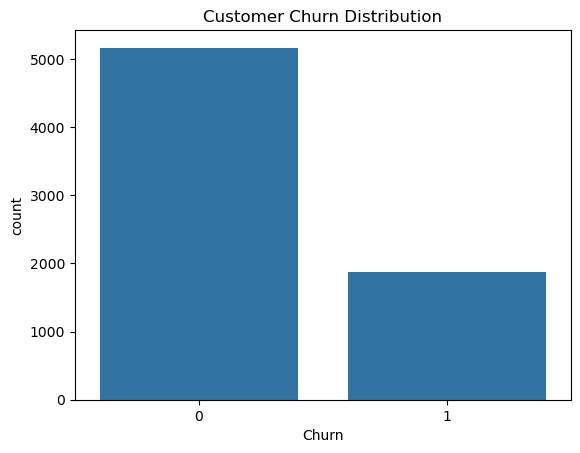

In [8]:
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()


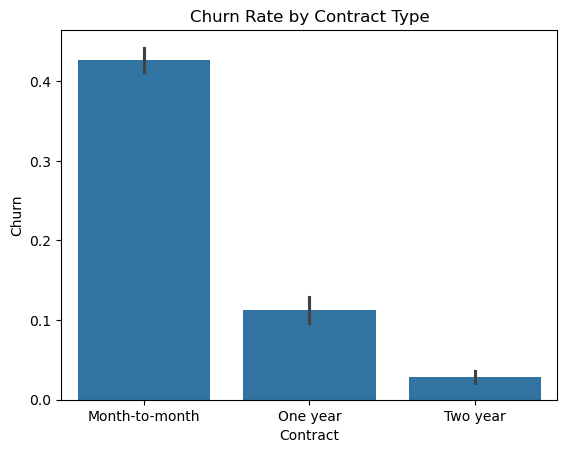

In [9]:
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Churn Rate by Contract Type")
plt.show()


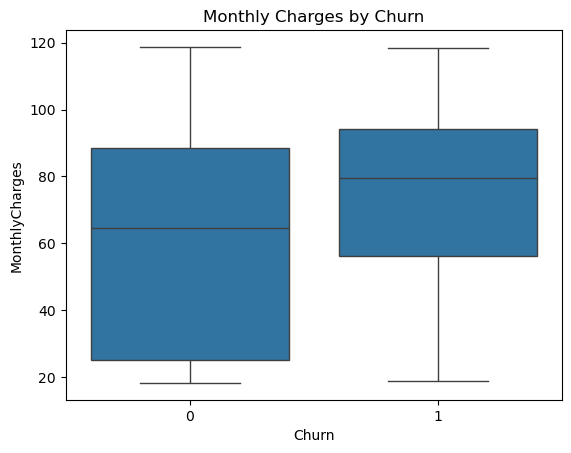

In [10]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn")
plt.show()


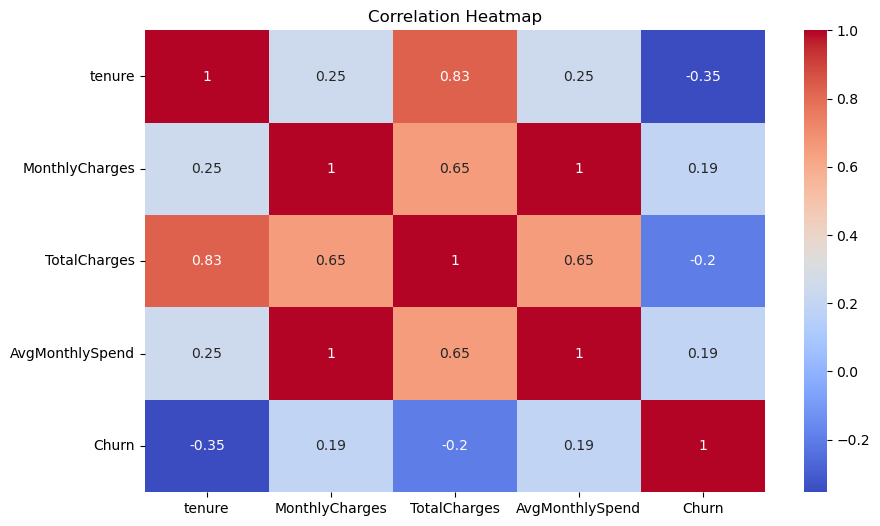

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_encoded[["tenure", "MonthlyCharges", "TotalCharges",
                "AvgMonthlySpend", "Churn"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


#### 5. Deliverables:

In [12]:
df_encoded.to_csv("telecom_churn_cleaned.csv", index=False)
